Initial Analysis

Processing: NoNoise.wav
Sample Rate: 44100, Length: 50274304 samples


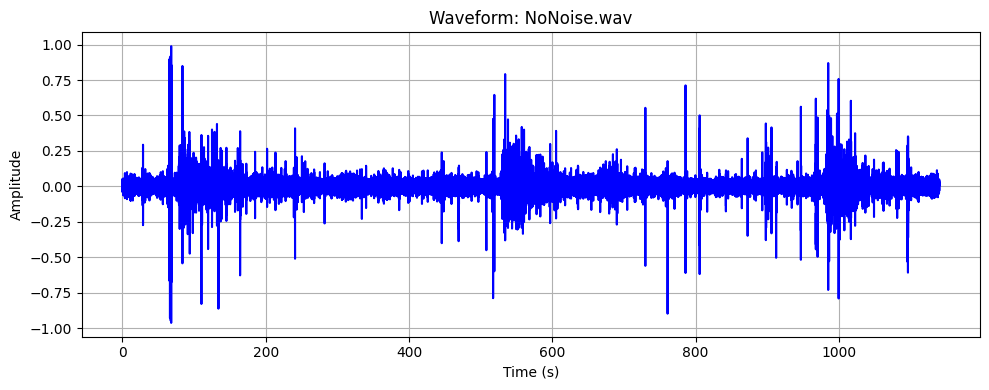

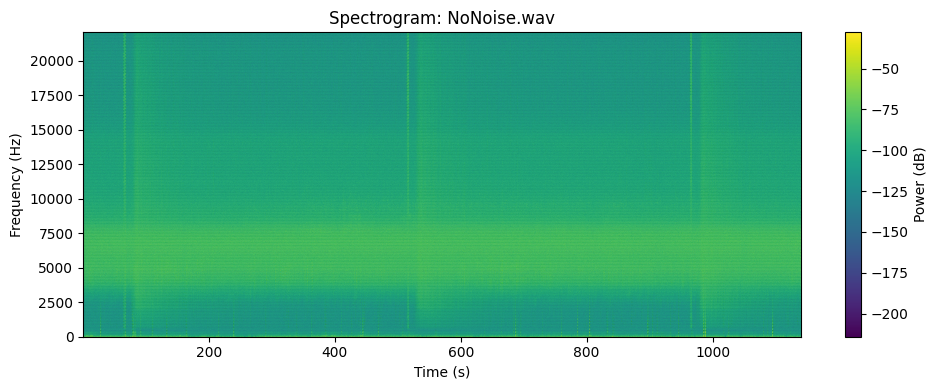

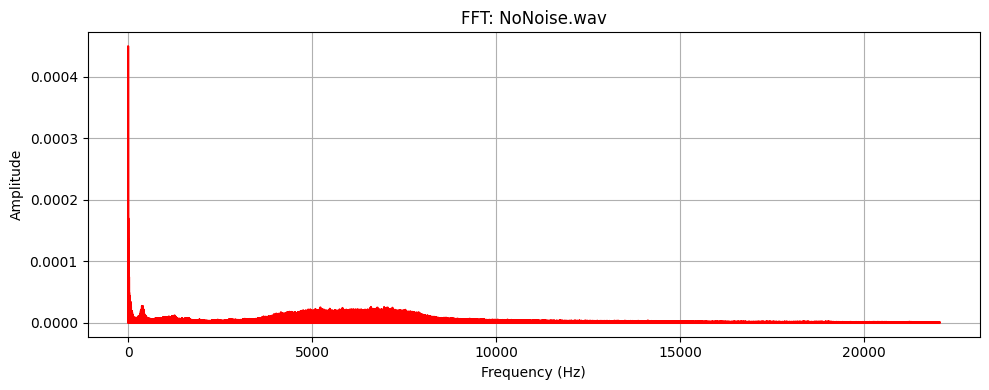

Processing: NoiseType1.wav
Sample Rate: 44100, Length: 21168128 samples


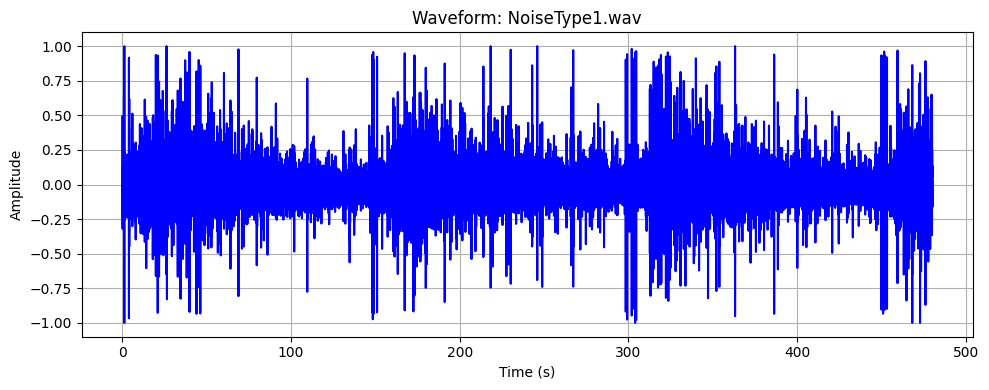

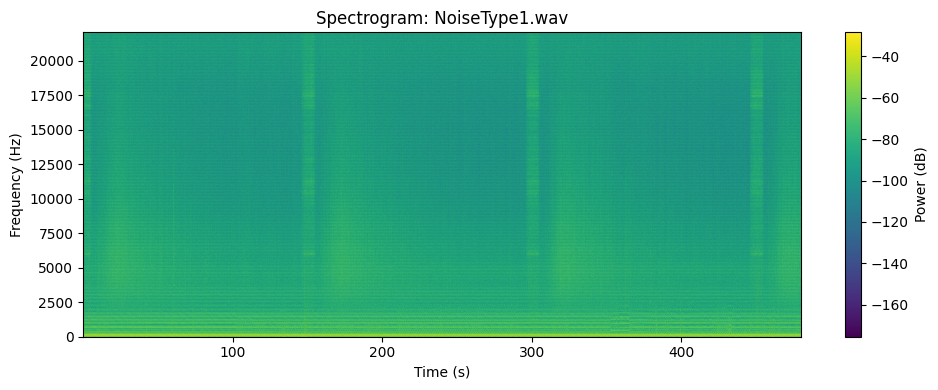

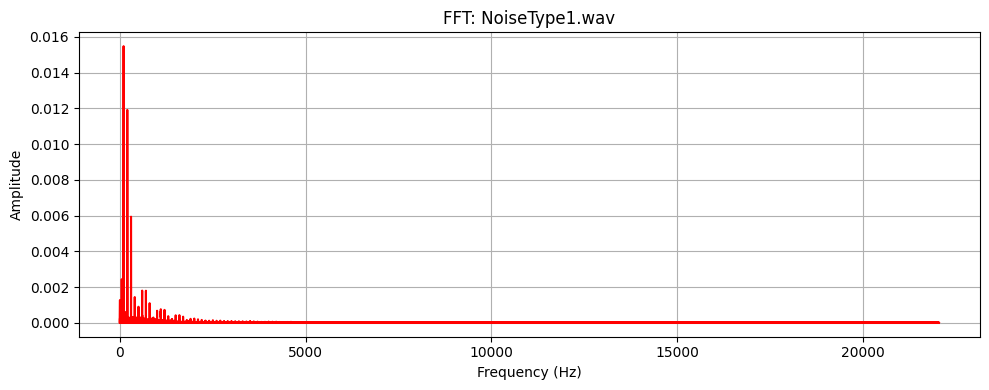

Processing: NoiseType2.wav
Sample Rate: 44100, Length: 39690240 samples


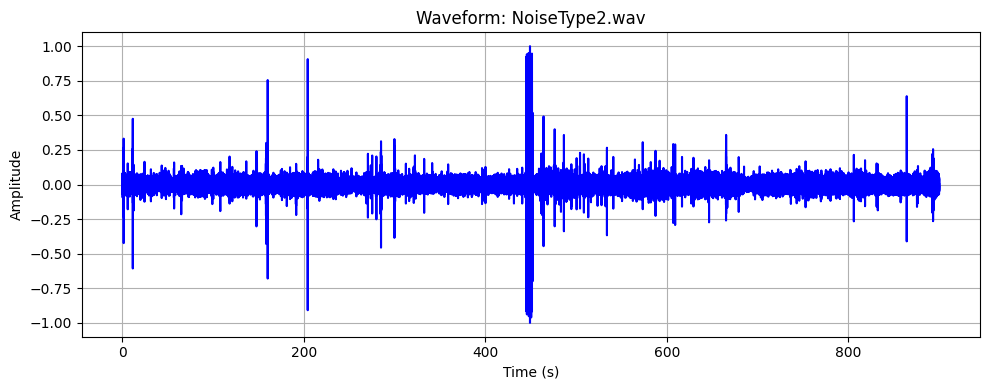

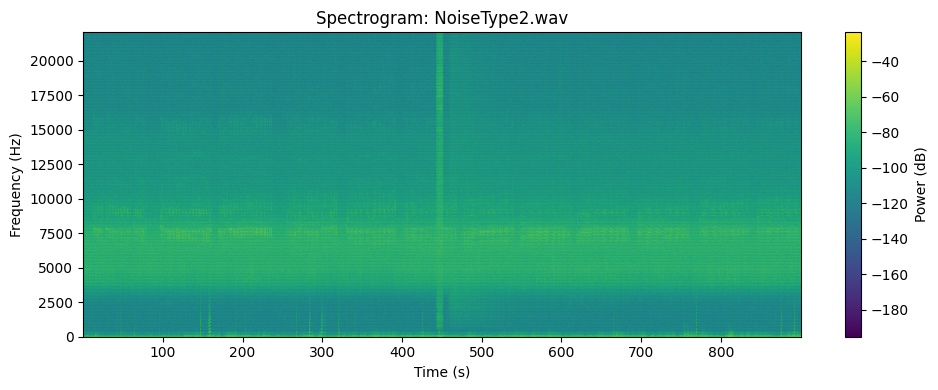

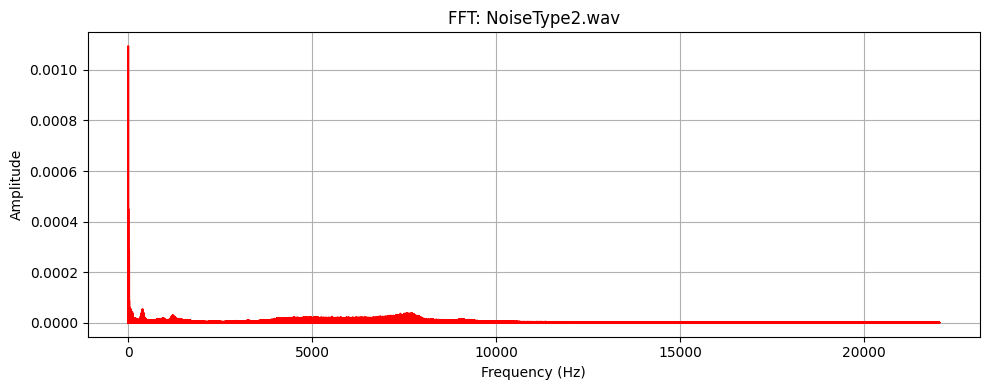

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import spectrogram
import soundfile as sf


def plot_waveform(audio, samplerate, title="Waveform"):
    """
    Plots the waveform of the audio signal.
    """
    time = np.linspace(0, len(audio) / samplerate, num=len(audio))
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio, color="blue")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()


def plot_spectrogram(audio, samplerate, title="Spectrogram"):
    """
    Plots the spectrogram of the audio signal.
    """
    f, t, Sxx = spectrogram(audio, samplerate, nperseg=1024)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Power (dB)")
    plt.tight_layout()
    plt.show()


def plot_fft(audio, samplerate, title="FFT"):
    """
    Plots the FFT of the audio signal.
    """
    N = len(audio)
    yf = fft(audio)
    xf = np.linspace(0.0, samplerate / 2.0, N // 2)
    plt.figure(figsize=(10, 4))
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]), color="red")
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()


def process_audio_files(audio_files):
    """
    Processes multiple audio files to display waveform, spectrogram, and FFT.
    """
    for audio_file in audio_files:
        print(f"Processing: {audio_file}")
        try:
            # Load the audio file
            audio, samplerate = sf.read(audio_file)
            print(f"Sample Rate: {samplerate}, Length: {len(audio)} samples")

            # Display waveform
            plot_waveform(audio, samplerate, title=f"Waveform: {os.path.basename(audio_file)}")

            # Display spectrogram
            plot_spectrogram(audio, samplerate, title=f"Spectrogram: {os.path.basename(audio_file)}")

            # Display FFT
            plot_fft(audio, samplerate, title=f"FFT: {os.path.basename(audio_file)}")

        except Exception as e:
            print(f"Error processing {audio_file}: {e}")


# Example Usage
if __name__ == "__main__":
    # Replace with paths to your 3 audio files
    audio_files = [
        "NoNoise.wav",
        "NoiseType1.wav",
        "NoiseType2.wav"
    ]
    process_audio_files(audio_files)


Logarithmic Frequency Scale

Processing: NoNoise.wav


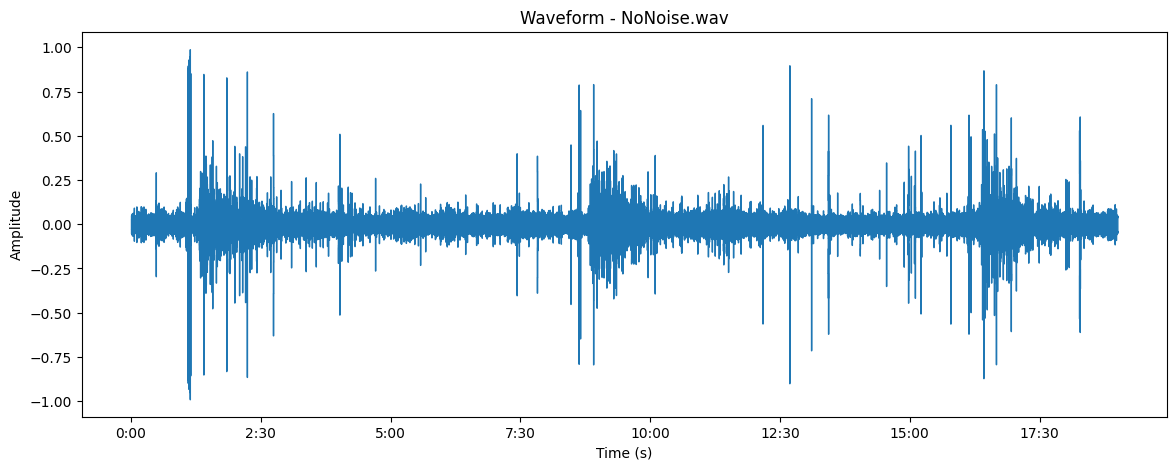

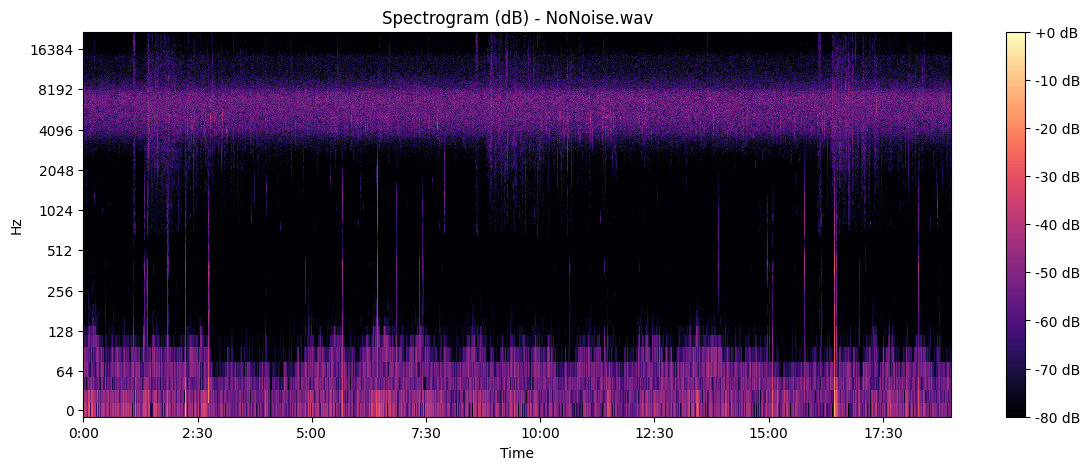

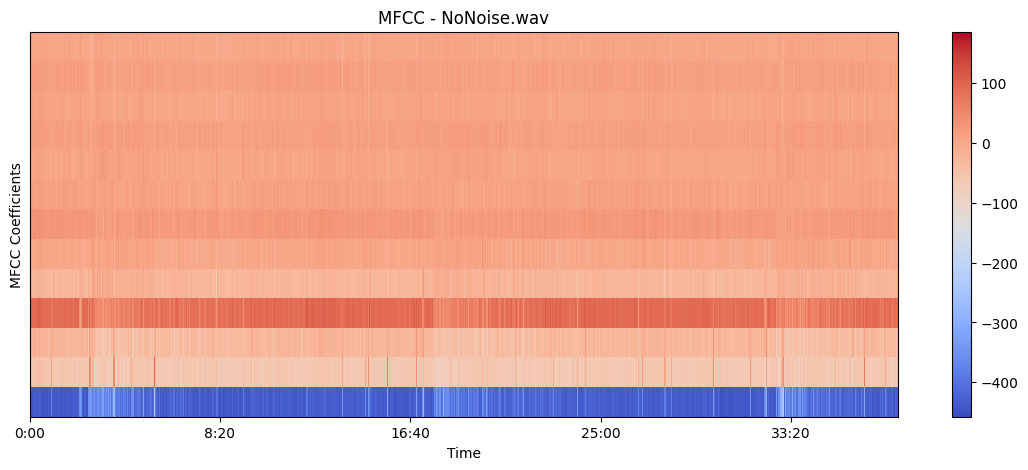

MFCCs saved to NoNoise.wav_mfcc_features.csv


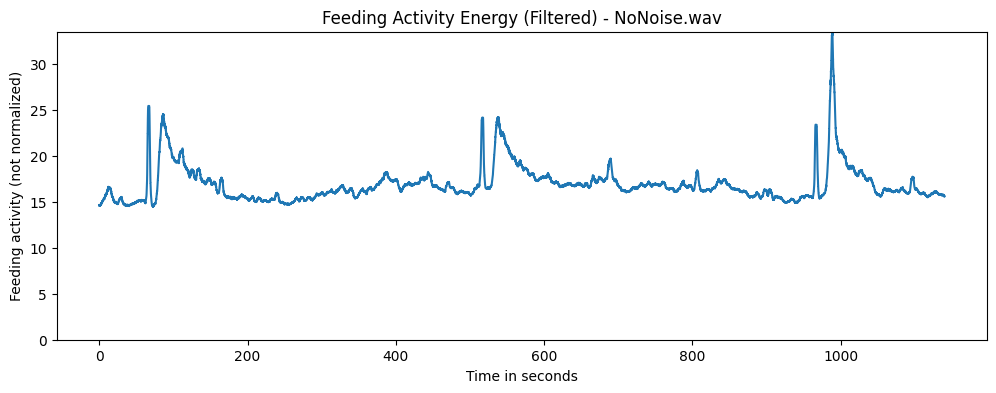

Feeding activity data saved to NoNoise.wav_feeding_activity_energy.csv


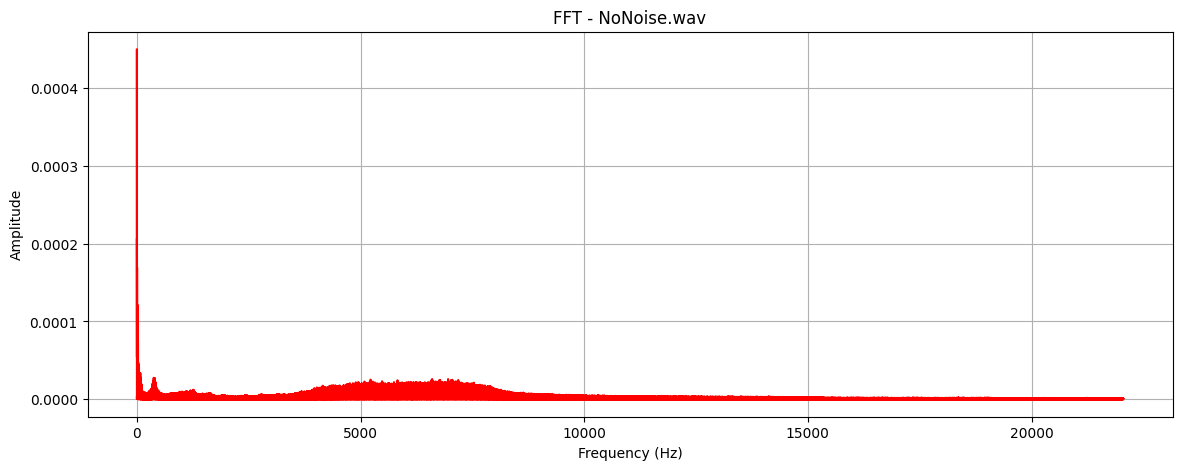

Processing: NoiseType1.wav


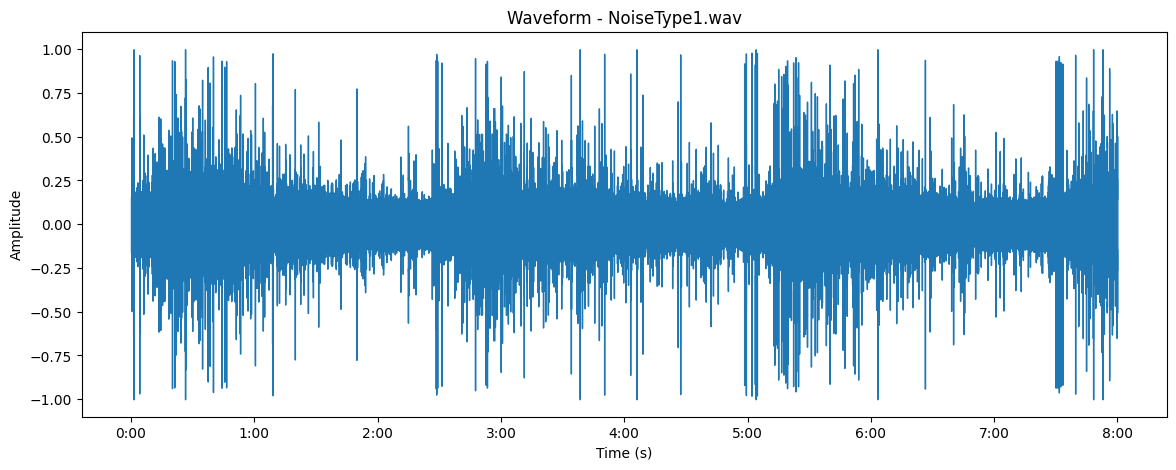

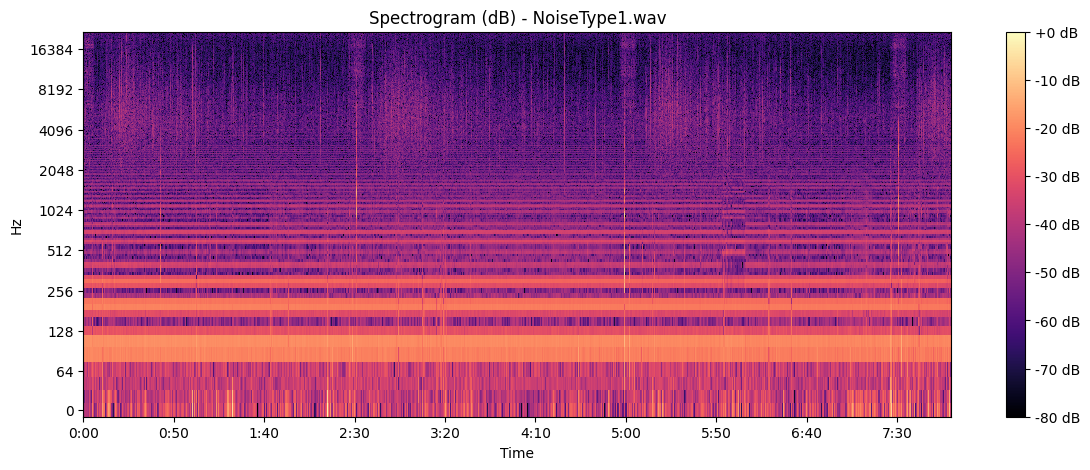

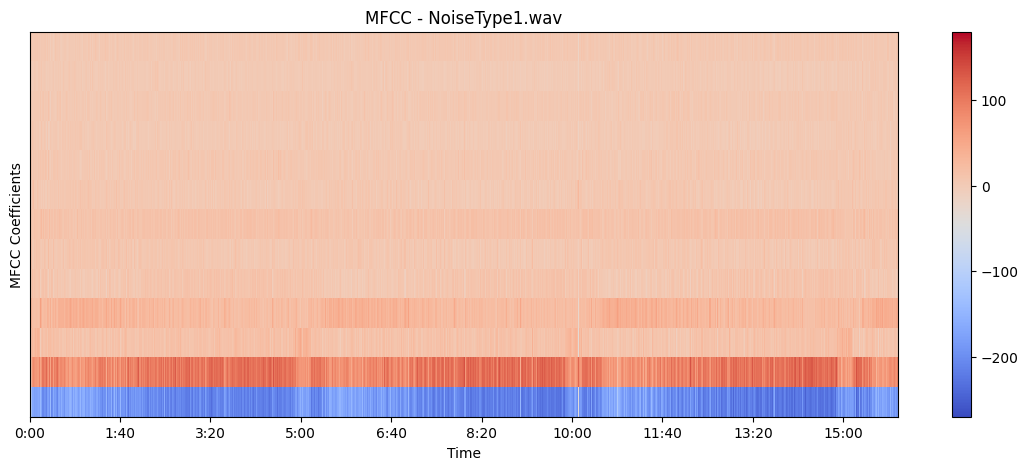

MFCCs saved to NoiseType1.wav_mfcc_features.csv


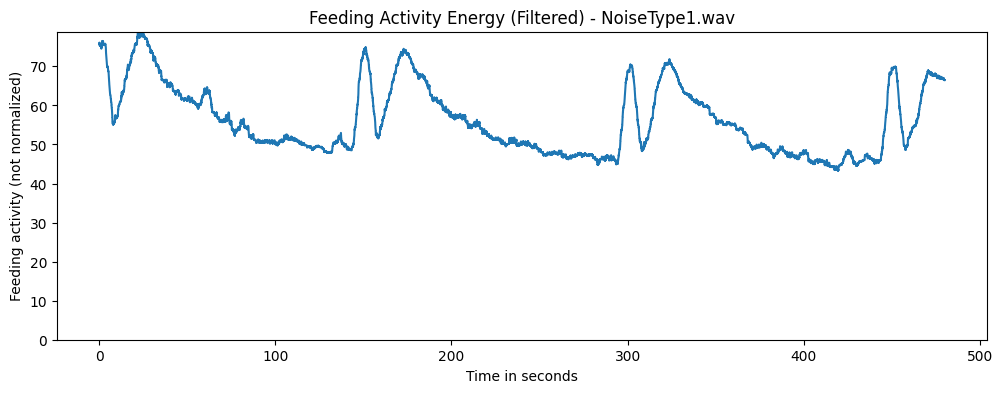

Feeding activity data saved to NoiseType1.wav_feeding_activity_energy.csv


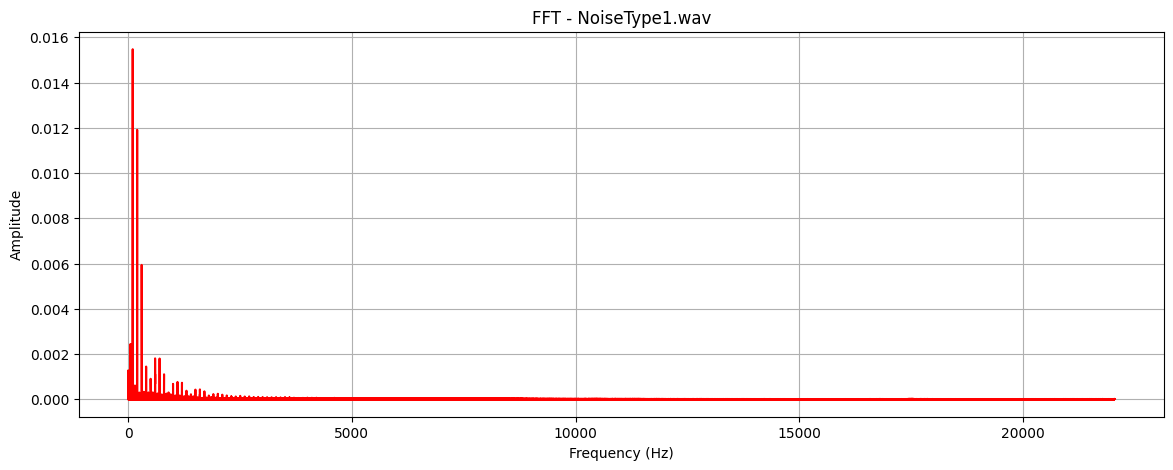

Processing: NoiseType2.wav


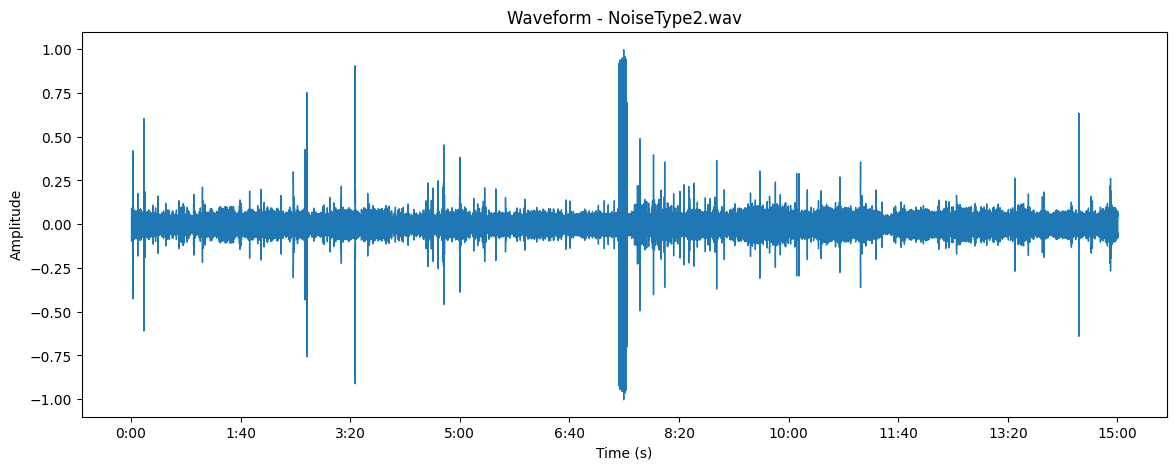

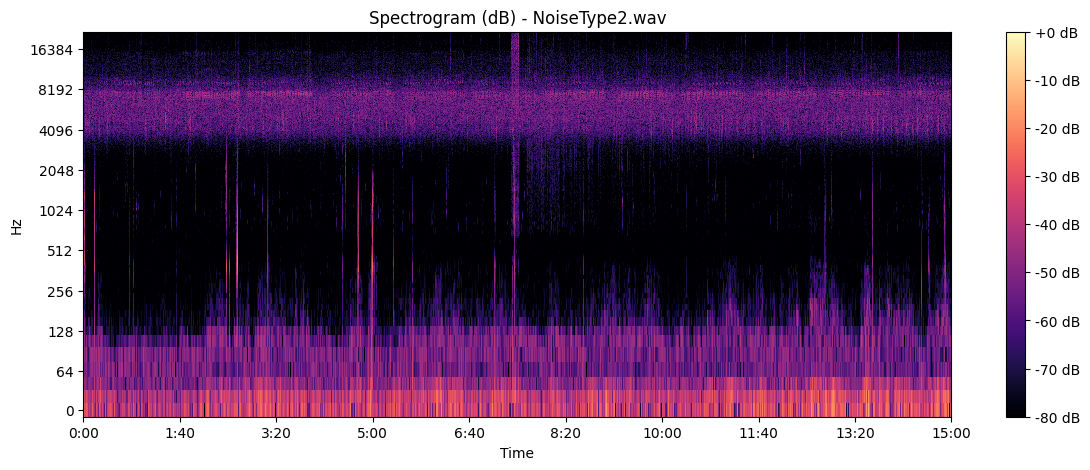

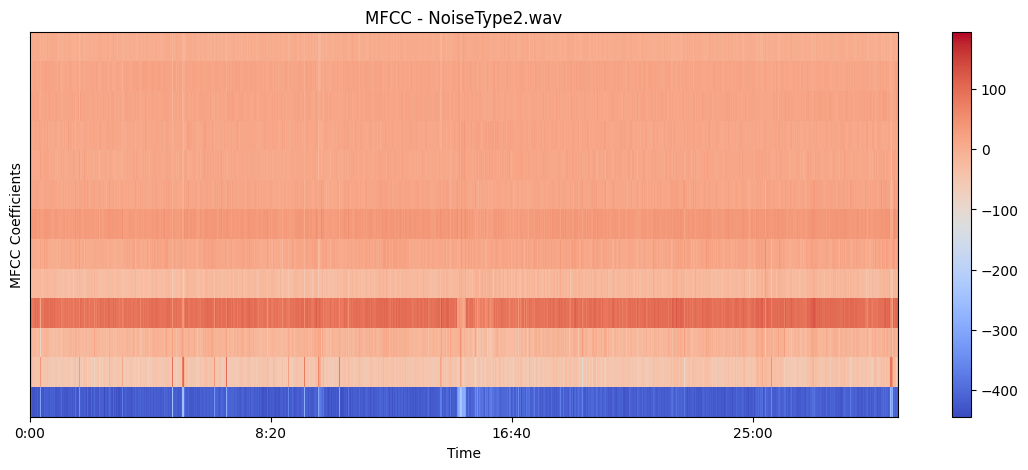

MFCCs saved to NoiseType2.wav_mfcc_features.csv


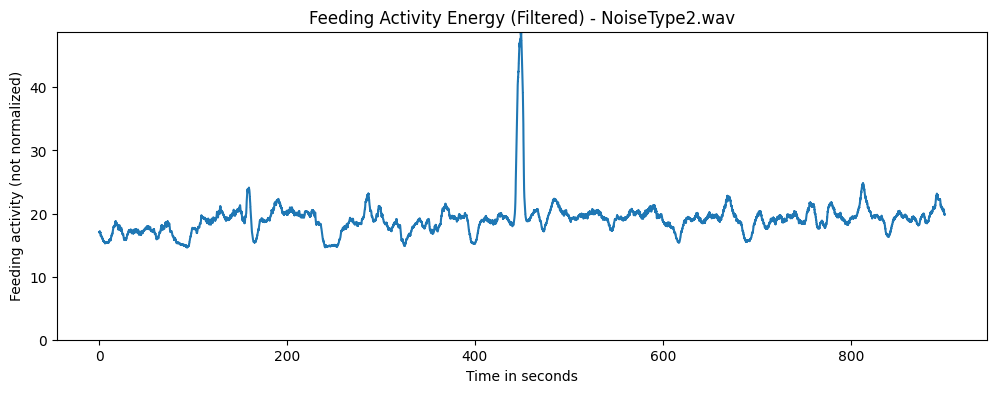

Feeding activity data saved to NoiseType2.wav_feeding_activity_energy.csv


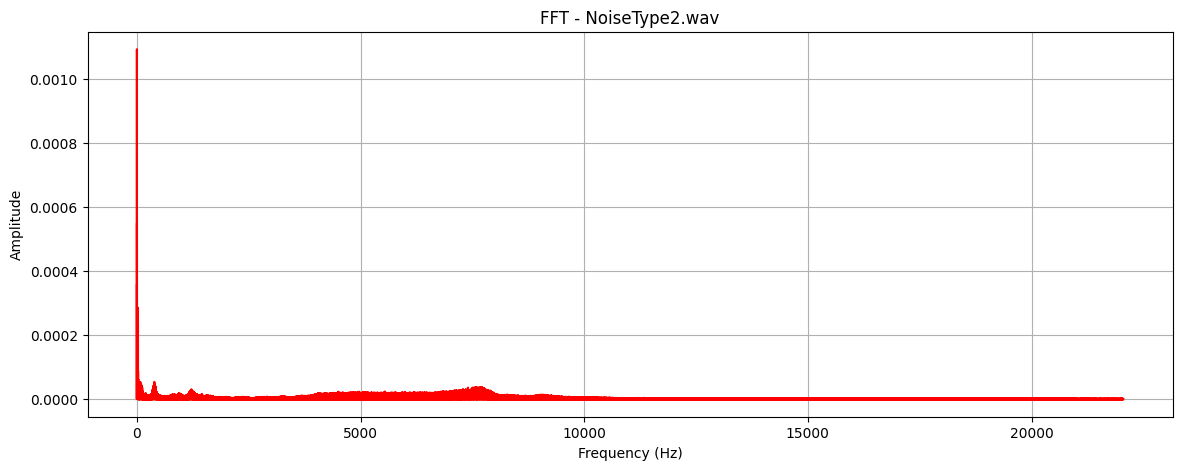

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
from scipy.fftpack import fft
from scipy.ndimage import median_filter

def process_audio_file(audio_path):
    """
    Process a single audio file to plot waveform, spectrogram, MFCC, energy, and FFT.
    """
    print(f"Processing: {audio_path}")
    
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # 1. Plot waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {audio_path}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # 2. Plot spectrogram (Short-Time Fourier Transform)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram (dB) - {audio_path}')
    plt.show()

    # 3. Extract and plot MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {audio_path}')
    plt.ylabel('MFCC Coefficients')
    plt.show()

    # Optional: Save the MFCCs for further analysis
    mfcc_filename = f"{audio_path}_mfcc_features.csv"
    np.savetxt(mfcc_filename, mfccs, delimiter=',')
    print(f"MFCCs saved to {mfcc_filename}")

    # 4. Analyze energy across all frequencies (feeding activity)

    # Parameters for energy calculation
    win_length = int(sr / 1000 * 10)  # 10 ms window length
    hop_length = int(win_length // 2 + 1)
    n_fft = int(2 ** np.ceil(np.log2(win_length)))

    # Compute the Short-Time Fourier Transform (STFT)
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

    # Frequency bins (in Hz)
    f = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    t = librosa.frames_to_time(np.arange(0, S.shape[1]), sr=sr, hop_length=hop_length)

    # Compute energy across all frequencies (sum across frequency bins)
    frame_wise_energy = np.sum(np.abs(S), axis=0)

    # Apply median filtering for smoother energy calculation
    medfilt_size = 997
    frame_wise_energy = median_filter(frame_wise_energy, size=medfilt_size)

    # Plot the filtered energy
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(t, frame_wise_energy)
    ax.set_ylim(0, np.max(frame_wise_energy))  # Dynamically adjust y-axis
    ax.set_xlabel('Time in seconds')
    ax.set_ylabel('Feeding activity (not normalized)')
    plt.title(f'Feeding Activity Energy (Filtered) - {audio_path}')
    plt.show()

    # Save the energy data for further analysis
    energy_filename = f"{audio_path}_feeding_activity_energy.csv"
    df = pd.DataFrame({'time': t, 'energy': frame_wise_energy})
    df.to_csv(energy_filename, index=False)
    print(f"Feeding activity data saved to {energy_filename}")

    # 5. Compute and plot FFT
    N = len(y)
    yf = fft(y)
    xf = np.linspace(0.0, sr / 2.0, N // 2)

    plt.figure(figsize=(14, 5))
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]), color="red")
    plt.title(f'FFT - {audio_path}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def process_multiple_audio_files(audio_files):
    """
    Process multiple audio files.
    """
    for audio_path in audio_files:
        process_audio_file(audio_path)


# Example usage
if __name__ == "__main__":
    # Replace with paths to your 3 audio files
    audio_files = [
        "NoNoise.wav",  # Replace with the actual file paths
        "NoiseType1.wav",
        "NoiseType2.wav"
    ]
    process_multiple_audio_files(audio_files)
